# Capstone Project
Performing thorough data cleaning and creating visualizations using Seaborn or Matplotlib

In [2]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

Loading and inspecting data

In [3]:
df = pd.read_csv(r"C:\Users\bukun\OneDrive\Desktop\Agriculture_dataset - Capstone Project.csv")

In [4]:
df.head()

,Farm_ID,Region,Crop_Type,Planting_Date,Harvest_Date,Area_ha,Yield_kg,Irrigation_Type,Soil_Type,Fertilizer_Used,Pesticide_Used,Rainfall_mm,Avg_Temperature_C,Farmer_Age,Organic
0,1,suoth,Soy,02/08/2023,29/12/2023,49.94,124319,Dr ip,Si lt,organik,Insecticide,1473.4,19.2,32,no
1,2,West,rice,16/08/2020,13/12/2020,3.22,10133,Sprink ler,Silt,Nitrogn-based,none,1555.0,31.7,59,yes
2,3,west,Cotton,21/02/2020,11/07/2020,29.14,57217,Flood,Loam,organik,NaN,918.7,18.1,52,no
3,4,suoth,rice,27/02/2024,15/08/2024,4.59,22377,Sprinkler,loam,mixd,MIXED,1988.1,13.8,39,No
4,5,East,Corn,17/07/2021,07/11/2021,8.15,50157,NaN,Silt,Nitrogn-based,herbicide,1564.5,26.0,53,No


In [5]:
from datetime import datetime

In [6]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4500
Number of columns: 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Farm_ID            4500 non-null   int64  
 1   Region             4500 non-null   object 
 2   Crop_Type          4500 non-null   object 
 3   Planting_Date      4500 non-null   object 
 4   Harvest_Date       4500 non-null   object 
 5   Area_ha            4500 non-null   float64
 6   Yield_kg           4500 non-null   int64  
 7   Irrigation_Type    4080 non-null   object 
 8   Soil_Type          4500 non-null   object 
 9   Fertilizer_Used    4350 non-null   object 
 10  Pesticide_Used     4291 non-null   object 
 11  Rainfall_mm        4500 non-null   float64
 12  Avg_Temperature_C  4500 non-null   float64
 13  Farmer_Age         4500 non-null   int64  
 14  Organic            4500 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 527.5+ KB


In [8]:
df.describe(include='all')

,Farm_ID,Region,Crop_Type,Planting_Date,Harvest_Date,Area_ha,Yield_kg,Irrigation_Type,Soil_Type,Fertilizer_Used,Pesticide_Used,Rainfall_mm,Avg_Temperature_C,Farmer_Age,Organic
count,4500.000000,4500,4500,4500,4500,4500.000000,4500.000000,4080,4500,4350,4291,4500.000000,4500.000000,4500.000000,4500
unique,NaN,7,13,1778,1790,NaN,NaN,14,19,15,15,NaN,NaN,NaN,4
top,NaN,west,wheat,10/06/2020,02/11/2021,NaN,NaN,Sprink ler,Sandy,ORGANIC,Insecticide,NaN,NaN,NaN,No
freq,NaN,666,377,9,8,NaN,NaN,363,272,390,387,NaN,NaN,NaN,1816
mean,2250.500000,NaN,NaN,NaN,NaN,24.814613,78306.350000,NaN,NaN,NaN,NaN,1043.681689,22.478178,47.323111,NaN
std,1299.182435,NaN,NaN,NaN,NaN,14.118023,54512.301489,NaN,NaN,NaN,NaN,546.769803,7.246152,13.339383,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.500000,1070.000000,NaN,NaN,NaN,NaN,100.000000,10.000000,25.000000,NaN
25%,1125.750000,NaN,NaN,NaN,NaN,12.710000,35631.750000,NaN,NaN,NaN,NaN,567.675000,16.300000,36.000000,NaN
50%,2250.500000,NaN,NaN,NaN,NaN,24.580000,70067.500000,NaN,NaN,NaN,NaN,1049.500000,22.400000,47.000000,NaN
75%,3375.250000,NaN,NaN,NaN,NaN,36.762500,108866.500000,NaN,NaN,NaN,NaN,1513.325000,28.900000,59.000000,NaN


Renaming & Standardizing Columns

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
df.columns

Index(['farm_id', 'region', 'crop_type', 'planting_date', 'harvest_date',
       'area_ha', 'yield_kg', 'irrigation_type', 'soil_type',
       'fertilizer_used', 'pesticide_used', 'rainfall_mm', 'avg_temperature_c',
       'farmer_age', 'organic'],
      dtype='object')

In [10]:
df.head()

,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,pesticide_used,rainfall_mm,avg_temperature_c,farmer_age,organic
0,1,suoth,Soy,02/08/2023,29/12/2023,49.94,124319,Dr ip,Si lt,organik,Insecticide,1473.4,19.2,32,no
1,2,West,rice,16/08/2020,13/12/2020,3.22,10133,Sprink ler,Silt,Nitrogn-based,none,1555.0,31.7,59,yes
2,3,west,Cotton,21/02/2020,11/07/2020,29.14,57217,Flood,Loam,organik,NaN,918.7,18.1,52,no
3,4,suoth,rice,27/02/2024,15/08/2024,4.59,22377,Sprinkler,loam,mixd,MIXED,1988.1,13.8,39,No
4,5,East,Corn,17/07/2021,07/11/2021,8.15,50157,NaN,Silt,Nitrogn-based,herbicide,1564.5,26.0,53,No


In [11]:
# Load columns as string to inspect raw values
df['planting_date'] = df['planting_date'].astype(str)
df['harvest_date'] = df['harvest_date'].astype(str)

In [12]:
# Try converting to datetime with errors='coerce' (invalid ones become NaT)
temp = pd.to_datetime(df['planting_date'], errors='coerce')

# View rows where the conversion failed
invalid_planting = df[temp.isna()]['planting_date'].unique()
print("Invalid planting_date entries:")
print(invalid_planting)

Invalid planting_date entries:
['16/08/2020' '21/02/2020' '27/02/2024' ... '14/12/2021' '15/07/2022'
 '26/12/2023']


In [13]:
# Convert to datetime while keeping day-first format
df['planting_date'] = pd.to_datetime(df['planting_date'], errors='coerce', dayfirst=True)
df['harvest_date'] = pd.to_datetime(df['harvest_date'], errors='coerce', dayfirst=True)

In [14]:
print("Still invalid planting_date:", df['planting_date'].isna().sum())
print("Still invalid harvest_date:", df['harvest_date'].isna().sum())

Still invalid planting_date: 0
Still invalid harvest_date: 0


In [15]:
df.head(10)

,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,pesticide_used,rainfall_mm,avg_temperature_c,farmer_age,organic
0,1,suoth,Soy,2023-08-02,2023-12-29,49.94,124319,Dr ip,Si lt,organik,Insecticide,1473.4,19.2,32,no
1,2,West,rice,2020-08-16,2020-12-13,3.22,10133,Sprink ler,Silt,Nitrogn-based,none,1555.0,31.7,59,yes
2,3,west,Cotton,2020-02-21,2020-07-11,29.14,57217,Flood,Loam,organik,NaN,918.7,18.1,52,no
3,4,suoth,rice,2024-02-27,2024-08-15,4.59,22377,Sprinkler,loam,mixd,MIXED,1988.1,13.8,39,No
4,5,East,Corn,2021-07-17,2021-11-07,8.15,50157,NaN,Silt,Nitrogn-based,herbicide,1564.5,26.0,53,No
5,6,west,Corn,2021-05-16,2021-09-06,22.26,114770,sprnkler,loam,organik,Insecticide,1199.5,11.1,28,no
6,7,west,Soy,2021-04-02,2021-09-20,25.77,54981,none,sand,none,mixed,1875.0,19.5,58,Yes
7,8,suoth,wheat,2020-10-12,2021-04-04,13.31,50342,sprnkler,Silt,Phyosphate-based,Mixed,1825.6,30.2,61,No
8,9,South,cotton,2024-02-17,2024-07-11,16.16,36299,Sprink ler,San dy,organik,Nne,1647.7,17.4,48,no
9,10,East,rice,2020-07-28,2020-12-15,4.80,16574,Nne,Si lt,Mi xed,Insectcide,1171.0,33.3,45,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   farm_id            4500 non-null   int64         
 1   region             4500 non-null   object        
 2   crop_type          4500 non-null   object        
 3   planting_date      4500 non-null   datetime64[ns]
 4   harvest_date       4500 non-null   datetime64[ns]
 5   area_ha            4500 non-null   float64       
 6   yield_kg           4500 non-null   int64         
 7   irrigation_type    4080 non-null   object        
 8   soil_type          4500 non-null   object        
 9   fertilizer_used    4350 non-null   object        
 10  pesticide_used     4291 non-null   object        
 11  rainfall_mm        4500 non-null   float64       
 12  avg_temperature_c  4500 non-null   float64       
 13  farmer_age         4500 non-null   int64         
 14  organic 

In [17]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4500
Number of columns: 15


Cleaning Noisy Categorical Values

In [18]:
df['region'].unique()

array(['suoth', 'West', 'west', 'East', 'South', 'Soth', 'North'],
      dtype=object)

In [19]:
# Striping whitespace and apply title case
df['region'] = df['region'].str.strip().str.title()

# Replacing common typos with correct values
region_corrections = {
    'Suoth': 'South',
    'Soth': 'South',
    'West': 'West', 
    'East': 'East',
    'South': 'South',
    'North': 'North'
}
df['region'] = df['region'].replace(region_corrections)

In [20]:
print(df['region'].unique())

['South' 'West' 'East' 'North']


In [21]:
df['region'].head()

0    South
1     West
2     West
3    South
4     East
Name: region, dtype: object

In [22]:
df['crop_type'].unique()

array(['Soy', 'rice', 'Cotton', 'Corn', 'wheat', 'cotton', 'corn', 'Rice',
       'barlay', 'Barley', 'Wheat', 'Soybeans', 'Soybean'], dtype=object)

In [23]:
df['crop_type'] = df['crop_type'].str.strip().str.title()

crop_corrections = {
    'Soy': 'Soybean',
    'Soybeans': 'Soybean',
    'Soybean': 'Soybean',
    'Rice': 'Rice',
    'Wheat': 'Wheat',
    'Corn': 'Corn',
    'Barlay': 'Barley',  
    'Barley': 'Barley',
    'Cotton': 'Cotton'
}
df['crop_type'] = df['crop_type'].replace(crop_corrections)

In [24]:
df['crop_type'].unique()

array(['Soybean', 'Rice', 'Cotton', 'Corn', 'Wheat', 'Barley'],
      dtype=object)

In [25]:
df['crop_type'].head()

0    Soybean
1       Rice
2     Cotton
3       Rice
4       Corn
Name: crop_type, dtype: object

In [26]:
df['irrigation_type'].unique()

array(['Dr ip', 'Sprink ler', 'Flood', 'Sprinkler', nan, 'sprnkler',
       'none', 'Nne', 'Floo d', 'dripp', 'SPRINKLER', 'Drip', 'Flod',
       'DRIp', 'flood'], dtype=object)

In [27]:
df['irrigation_type'] = df['irrigation_type'].astype(str).str.replace(" ", "").str.lower()

irrigation_corrections = {
    'drip': 'Drip',
    'dripp': 'Drip',
    'drip': 'Drip',
    'drip': 'Drip',
    'drip': 'Drip',
    'sprinkler': 'Sprinkler',
    'sprnkler': 'Sprinkler',
    'flood': 'Flood',
    'flod': 'Flood',
    'floood': 'Flood',
    'none': 'None',
    'nne': 'None'
}

df['irrigation_type'] = df['irrigation_type'].replace(irrigation_corrections)

# Convert 'nan' back to actual NaN
df['irrigation_type'] = df['irrigation_type'].replace('nan', np.nan)

In [28]:
print(df['irrigation_type'].unique())

['Drip' 'Sprinkler' 'Flood' nan 'None']


In [29]:
df['soil_type'].unique()

array(['Si lt', 'Silt', 'Loam', 'loam', 'sand', 'San dy', 'silt', 'PEAT',
       'Cl ay', 'Lom', 'Cly', 'Peat', 'Clay', 'Sandy', 'Peet', 'peat',
       'clay', 'SANDY', 'LOAM'], dtype=object)

In [30]:
# 1. Remove inner whitespace and convert to lowercase
df['soil_type'] = df['soil_type'].astype(str).str.replace(" ", "").str.lower()

# 2. Create a mapping dictionary for standardization
soil_corrections = {
    'silt': 'Silt',
    'sil': 'Silt',  # just in case
    'loam': 'Loam',
    'lom': 'Loam',
    'clay': 'Clay',
    'clay': 'Clay',
    'clay': 'Clay',
    'cly': 'Clay',
    'sand': 'Sandy',
    'sandy': 'Sandy',
    'peat': 'Peat',
    'peet': 'Peat'
}

# 3. Apply corrections
df['soil_type'] = df['soil_type'].replace(soil_corrections)

# 4. Convert 'nan' strings (if any) back to actual NaN
df['soil_type'] = df['soil_type'].replace('nan', np.nan)

In [31]:
print(df['soil_type'].unique())

['Silt' 'Loam' 'Sandy' 'Peat' 'Clay']


In [32]:
df['fertilizer_used'].unique()

array(['organik', 'Nitrogn-based', 'mixd', 'none', 'Phyosphate-based',
       'Mi xed', 'nitrogen based', 'ORGANIC', 'Phosphate-based', 'Mixed',
       'Non', 'phosphate based', 'Nitrogen-based', 'Organic', 'MIXED',
       nan], dtype=object)

In [33]:
# 1. Remove inner whitespace and convert to lowercase
df['fertilizer_used'] = df['fertilizer_used'].astype(str).str.replace(" ", "").str.lower()

# 2. Create mapping dictionary for corrections
fertilizer_corrections = {
    'none': 'None',
    'non': 'None',
    'organik': 'Organic',
    'organic': 'Organic',
    'nitrogn-based': 'Nitrogen-based',
    'nitrogen-based': 'Nitrogen-based',
    'nitrogenbased': 'Nitrogen-based',
    'phyosphate-based': 'Phosphate-based',
    'phosphate-based': 'Phosphate-based',
    'phosphatebased': 'Phosphate-based',
    'mixd': 'Mixed',
    'mixed': 'Mixed',
    'mixed': 'Mixed',
    'mixed': 'Mixed'
}

# 3. Apply mapping
df['fertilizer_used'] = df['fertilizer_used'].replace(fertilizer_corrections)

# 4. Convert any 'nan' strings to actual NaN
df['fertilizer_used'] = df['fertilizer_used'].replace('nan', np.nan)

In [34]:
print(df['fertilizer_used'].unique())

['Organic' 'Nitrogen-based' 'Mixed' 'None' 'Phosphate-based' nan]


In [35]:
df['pesticide_used'].unique()

array(['Insecticide', 'none', nan, 'MIXED', 'herbicide', 'mixed', 'Mixed',
       'Nne', 'Insectcide', 'fungicid', 'Fungi cide', 'Herbicide',
       'Fungicide', 'Herbicid', 'insecticide', 'mix ed'], dtype=object)

In [36]:
# 1. Remove inner spaces and lowercase everything
df['pesticide_used'] = df['pesticide_used'].astype(str).str.replace(" ", "").str.lower()

# 2. Create a mapping dictionary
pesticide_corrections = {
    'none': 'None',
    'nne': 'None',
    'herbicide': 'Herbicide',
    'herbicid': 'Herbicide',
    'insecticide': 'Insecticide',
    'insectcide': 'Insecticide',
    'fungicide': 'Fungicide',
    'fungicid': 'Fungicide',
    'fungicide': 'Fungicide',
    'mixed': 'Mixed',
    'mixed': 'Mixed',
    'mixed': 'Mixed'
}
# 3. Apply mapping
df['pesticide_used'] = df['pesticide_used'].replace(pesticide_corrections)
# 4. Convert 'nan' string back to actual NaN
df['pesticide_used'] = df['pesticide_used'].replace('nan', np.nan)

In [37]:
print(df['pesticide_used'].unique())

['Insecticide' 'None' nan 'Mixed' 'Herbicide' 'Fungicide']


Handling Dates & Deriving New Features

In [38]:
df['planting_year'] = df['planting_date'].dt.year
df['harvest_year'] = df['harvest_date'].dt.year
df['planting_month'] = df['planting_date'].dt.to_period('M').astype(str)

In [39]:
df.head()

,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,pesticide_used,rainfall_mm,avg_temperature_c,farmer_age,organic,planting_year,harvest_year,planting_month
0,1,South,Soybean,2023-08-02,2023-12-29,49.94,124319,Drip,Silt,Organic,Insecticide,1473.4,19.2,32,no,2023,2023,2023-08
1,2,West,Rice,2020-08-16,2020-12-13,3.22,10133,Sprinkler,Silt,Nitrogen-based,None,1555.0,31.7,59,yes,2020,2020,2020-08
2,3,West,Cotton,2020-02-21,2020-07-11,29.14,57217,Flood,Loam,Organic,NaN,918.7,18.1,52,no,2020,2020,2020-02
3,4,South,Rice,2024-02-27,2024-08-15,4.59,22377,Sprinkler,Loam,Mixed,Mixed,1988.1,13.8,39,No,2024,2024,2024-02
4,5,East,Corn,2021-07-17,2021-11-07,8.15,50157,NaN,Silt,Nitrogen-based,Herbicide,1564.5,26.0,53,No,2021,2021,2021-07


In [40]:
# Calculating growing days
df['growing_days'] = (df['harvest_date'] - df['planting_date']).dt.days

In [41]:
# Calculating days since harvest
today = pd.Timestamp.today()
df['days_since_harvest'] = (today - df['harvest_date']).dt.days

In [42]:
invalid_dates = df[df['growing_days'] < 0]
print(f"Invalid date rows: {len(invalid_dates)}")

Invalid date rows: 0


In [43]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4500
Number of columns: 20


In [44]:
df.head(10)

,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,pesticide_used,rainfall_mm,avg_temperature_c,farmer_age,organic,planting_year,harvest_year,planting_month,growing_days,days_since_harvest
0,1,South,Soybean,2023-08-02,2023-12-29,49.94,124319,Drip,Silt,Organic,Insecticide,1473.4,19.2,32,no,2023,2023,2023-08,149,530
1,2,West,Rice,2020-08-16,2020-12-13,3.22,10133,Sprinkler,Silt,Nitrogen-based,None,1555.0,31.7,59,yes,2020,2020,2020-08,119,1641
2,3,West,Cotton,2020-02-21,2020-07-11,29.14,57217,Flood,Loam,Organic,NaN,918.7,18.1,52,no,2020,2020,2020-02,141,1796
3,4,South,Rice,2024-02-27,2024-08-15,4.59,22377,Sprinkler,Loam,Mixed,Mixed,1988.1,13.8,39,No,2024,2024,2024-02,170,300
4,5,East,Corn,2021-07-17,2021-11-07,8.15,50157,NaN,Silt,Nitrogen-based,Herbicide,1564.5,26.0,53,No,2021,2021,2021-07,113,1312
5,6,West,Corn,2021-05-16,2021-09-06,22.26,114770,Sprinkler,Loam,Organic,Insecticide,1199.5,11.1,28,no,2021,2021,2021-05,113,1374
6,7,West,Soybean,2021-04-02,2021-09-20,25.77,54981,None,Sandy,None,Mixed,1875.0,19.5,58,Yes,2021,2021,2021-04,171,1360
7,8,South,Wheat,2020-10-12,2021-04-04,13.31,50342,Sprinkler,Silt,Phosphate-based,Mixed,1825.6,30.2,61,No,2020,2021,2020-10,174,1529
8,9,South,Cotton,2024-02-17,2024-07-11,16.16,36299,Sprinkler,Sandy,Organic,None,1647.7,17.4,48,no,2024,2024,2024-02,145,335
9,10,East,Rice,2020-07-28,2020-12-15,4.80,16574,None,Silt,Mixed,Insecticide,1171.0,33.3,45,No,2020,2020,2020-07,140,1639


In [45]:
df[['planting_date', 'harvest_date', 'planting_year', 'planting_month', 'growing_days', 'days_since_harvest']].head()

,planting_date,harvest_date,planting_year,planting_month,growing_days,days_since_harvest
0,2023-08-02,2023-12-29,2023,2023-08,149,530
1,2020-08-16,2020-12-13,2020,2020-08,119,1641
2,2020-02-21,2020-07-11,2020,2020-02,141,1796
3,2024-02-27,2024-08-15,2024,2024-02,170,300
4,2021-07-17,2021-11-07,2021,2021-07,113,1312


Checking for Missing or Implausible Values

In [46]:
# Counting nulls in each column
missing_counts = df.isnull().sum()
print(missing_counts)

farm_id                 0
region                  0
crop_type               0
planting_date           0
harvest_date            0
area_ha                 0
yield_kg                0
irrigation_type       420
soil_type               0
fertilizer_used       150
pesticide_used        209
rainfall_mm             0
avg_temperature_c       0
farmer_age              0
organic                 0
planting_year           0
harvest_year            0
planting_month          0
growing_days            0
days_since_harvest      0
dtype: int64


In [47]:
df['irrigation_type'].fillna('Unknown', inplace=True)
df['fertilizer_used'].fillna('Unknown', inplace=True)
df['pesticide_used'].fillna('Unknown', inplace=True)

In [48]:
# Confirm no more missing values
print(df.isnull().sum())

farm_id               0
region                0
crop_type             0
planting_date         0
harvest_date          0
area_ha               0
yield_kg              0
irrigation_type       0
soil_type             0
fertilizer_used       0
pesticide_used        0
rainfall_mm           0
avg_temperature_c     0
farmer_age            0
organic               0
planting_year         0
harvest_year          0
planting_month        0
growing_days          0
days_since_harvest    0
dtype: int64


Converting Data Types

In [49]:
categorical_cols = [
    'region', 'crop_type', 'irrigation_type', 'soil_type',
    'fertilizer_used', 'pesticide_used', 'planting_month'
]

df[categorical_cols] = df[categorical_cols].astype('category')

In [50]:
df['organic'] = df['organic'].astype('category')

In [51]:
print(df.dtypes)

farm_id                        int64
region                      category
crop_type                   category
planting_date         datetime64[ns]
harvest_date          datetime64[ns]
area_ha                      float64
yield_kg                       int64
irrigation_type             category
soil_type                   category
fertilizer_used             category
pesticide_used              category
rainfall_mm                  float64
avg_temperature_c            float64
farmer_age                     int64
organic                     category
planting_year                  int32
harvest_year                   int32
planting_month              category
growing_days                   int64
days_since_harvest             int64
dtype: object


Removing Duplicates

In [52]:
# Check for duplicate farm_id
duplicate_farms = df[df.duplicated(subset='farm_id', keep=False)]
print(f"Number of duplicate farm_id entries: {duplicate_farms.shape[0]}")

Number of duplicate farm_id entries: 0


In [53]:
# Check for exact duplicate rows
exact_duplicates = df[df.duplicated()]
print(f"Number of exact duplicate rows: {exact_duplicates.shape[0]}")

Number of exact duplicate rows: 0


In [54]:
# Check for duplicates based on a combination of key fields
key_columns = ['farm_id', 'crop_type', 'planting_date']
partial_duplicates = df[df.duplicated(subset=key_columns, keep=False)]
print(f"Number of duplicate (farm_id, crop_type, planting_date): {partial_duplicates.shape[0]}")

Number of duplicate (farm_id, crop_type, planting_date): 0


In [55]:
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (4500, 20)


Exporting Clean Data

In [56]:
# Save cleaned DataFrame to a CSV file
df.to_csv('cleaned_agri_data.csv', index=False)

In [57]:
# Load the file to check
df_cleaned = pd.read_csv('cleaned_agri_data.csv')
print(df_cleaned.shape)
df_cleaned.head()

(4500, 20)


,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,pesticide_used,rainfall_mm,avg_temperature_c,farmer_age,organic,planting_year,harvest_year,planting_month,growing_days,days_since_harvest
0,1,South,Soybean,2023-08-02,2023-12-29,49.94,124319,Drip,Silt,Organic,Insecticide,1473.4,19.2,32,no,2023,2023,2023-08,149,530
1,2,West,Rice,2020-08-16,2020-12-13,3.22,10133,Sprinkler,Silt,Nitrogen-based,NaN,1555.0,31.7,59,yes,2020,2020,2020-08,119,1641
2,3,West,Cotton,2020-02-21,2020-07-11,29.14,57217,Flood,Loam,Organic,Unknown,918.7,18.1,52,no,2020,2020,2020-02,141,1796
3,4,South,Rice,2024-02-27,2024-08-15,4.59,22377,Sprinkler,Loam,Mixed,Mixed,1988.1,13.8,39,No,2024,2024,2024-02,170,300
4,5,East,Corn,2021-07-17,2021-11-07,8.15,50157,Unknown,Silt,Nitrogen-based,Herbicide,1564.5,26.0,53,No,2021,2021,2021-07,113,1312


In [58]:
import os
print(os.getcwd())

c:\Users\bukun\Downloads


# Data Analysis & Visualization

Region & Crop Insights

region
South    1885
West     1331
North     659
East      625
Name: count, dtype: int64


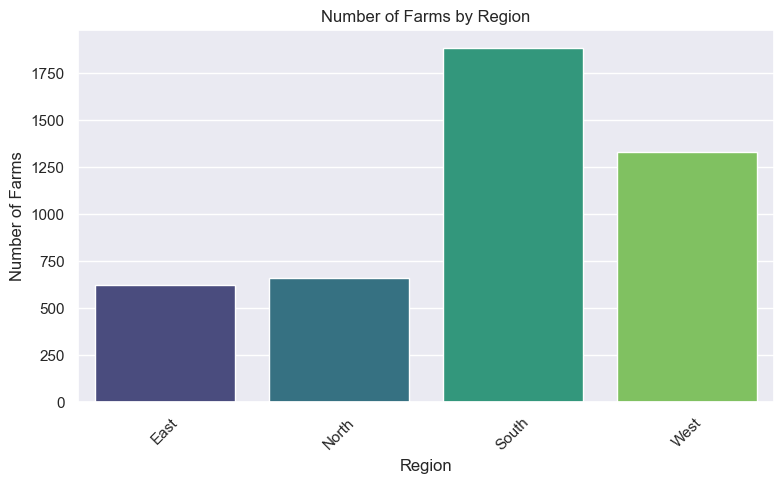

In [ ]:
# 1 - Which region has the highest number of farms?

# Count farms by region
region_counts = df['region'].value_counts()

print(region_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Farms by Region')
plt.xlabel('Region')
plt.ylabel('Number of Farms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


crop_type
Soybean    1052
Wheat       721
Cotton      707
Corn        696
Barley      666
Rice        658
Name: count, dtype: int64


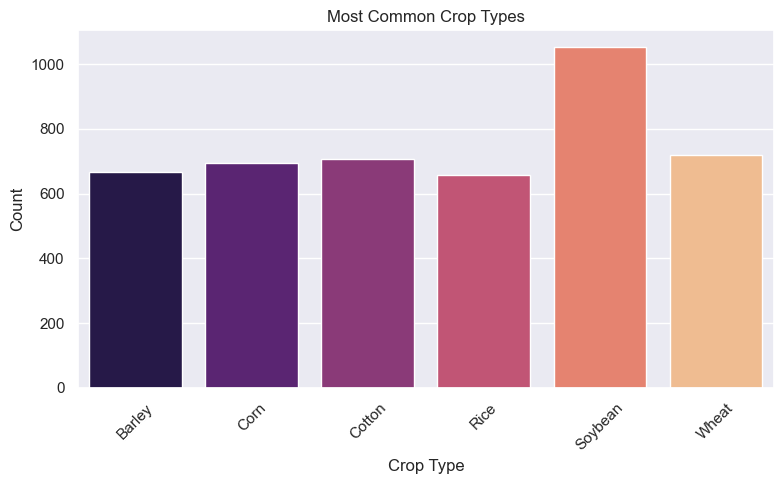

In [60]:
# 2. Which crop type appears most frequently overall and by region?

crop_counts = df['crop_type'].value_counts()
print(crop_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=crop_counts.index, y=crop_counts.values, palette='magma')
plt.title('Most Common Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crop_type  Barley  Corn  Cotton  Rice  Soybean  Wheat
region                                               
East           76   100      91   111      142    105
North          95   115      81   108      155    105
South         300   285     297   262      441    300
West          195   196     238   177      314    211


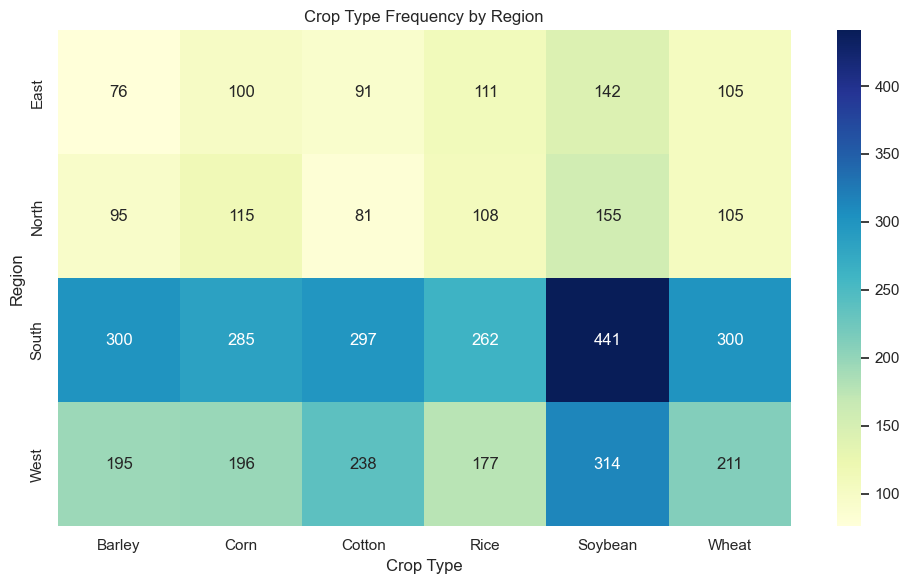

In [61]:
# By region

# Cross-tabulation
region_crop_counts = pd.crosstab(df['region'], df['crop_type'])

# Display top crops by region
print(region_crop_counts)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(region_crop_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crop Type Frequency by Region')
plt.xlabel('Crop Type')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [62]:
# 3. Top 3 and bottom 3 regions by average yield per hectare

df['yield_per_ha'] = df['yield_kg'] / df['area_ha']

Top 3 Regions by Average Yield per Hectare:
region
North    3238.759844
East     3208.450127
South    3157.058546
Name: yield_per_ha, dtype: float64

Bottom 3 Regions by Average Yield per Hectare:
region
East     3208.450127
South    3157.058546
West     3073.381601
Name: yield_per_ha, dtype: float64


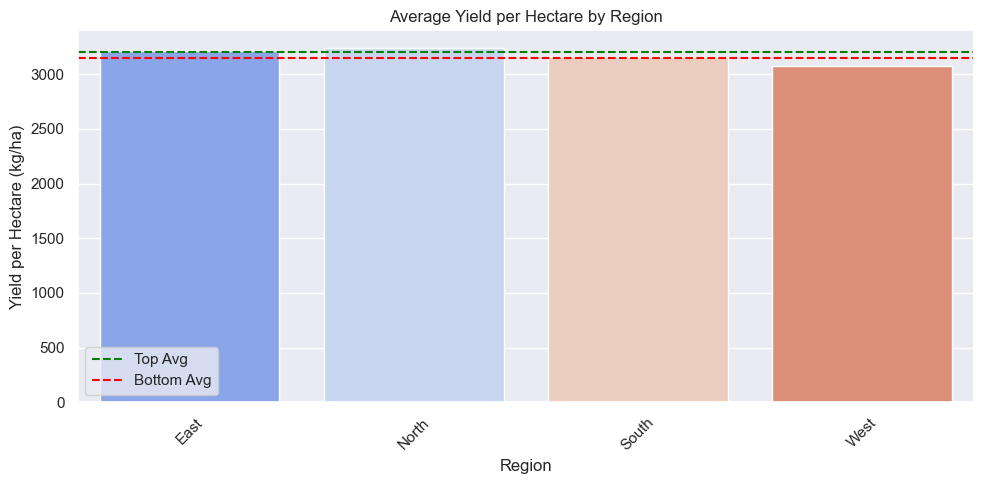

In [63]:
region_yield = df.groupby('region')['yield_per_ha'].mean().sort_values(ascending=False)

# Top 3
top_3 = region_yield.head(3)
print("Top 3 Regions by Average Yield per Hectare:")
print(top_3)

# Bottom 3
bottom_3 = region_yield.tail(3)
print("\nBottom 3 Regions by Average Yield per Hectare:")
print(bottom_3)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=region_yield.index, y=region_yield.values, palette='coolwarm')
plt.axhline(top_3.mean(), color='green', linestyle='--', label='Top Avg')
plt.axhline(bottom_3.mean(), color='red', linestyle='--', label='Bottom Avg')
plt.title('Average Yield per Hectare by Region')
plt.xlabel('Region')
plt.ylabel('Yield per Hectare (kg/ha)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Yield Analysis

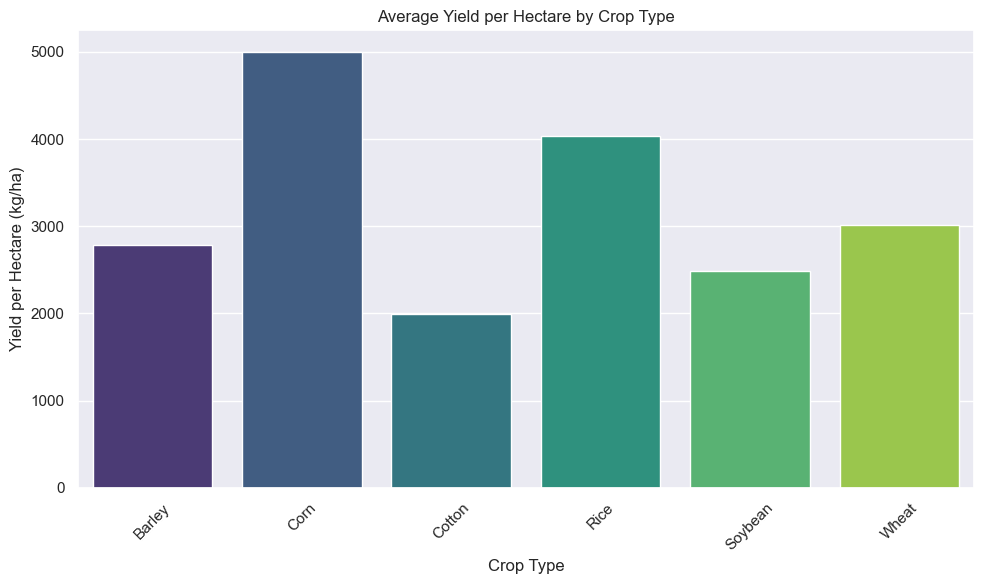

In [64]:
# 1. Average yield_kg per area_ha (yield per hectare) for each crop. Plot a bar chart comparing crops by yield/ha

# Creating a new column for yield per hectare
df['yield_per_ha'] = df['yield_kg'] / df['area_ha']

# Group by crop_type and calculate the mean yield per hectare
avg_yield_per_crop = df.groupby('crop_type')['yield_per_ha'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_yield_per_crop.index, y=avg_yield_per_crop.values, palette='viridis')
plt.title('Average Yield per Hectare by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield per Hectare (kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

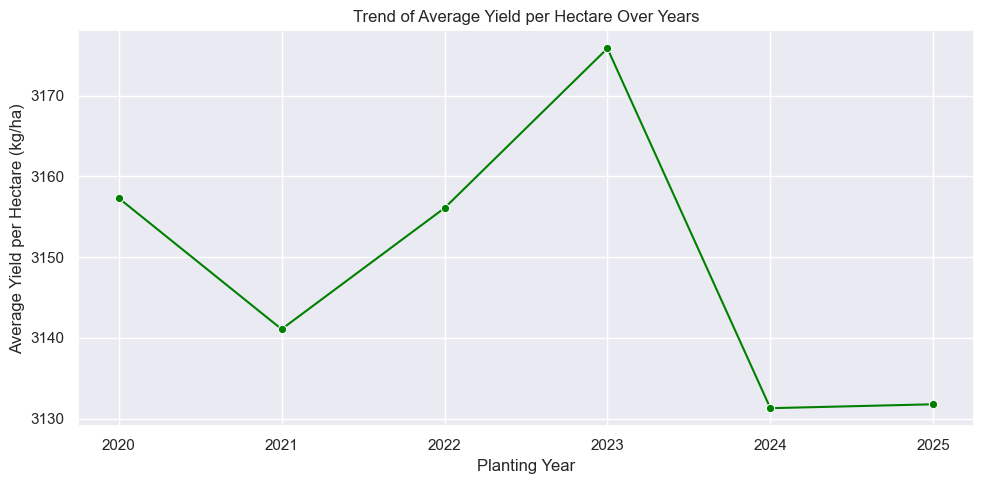

In [65]:
# 2. Trend of average yield over planting_year (e.g., line plot showing how mean yield/ha changes each year)

# Group by planting year and calculate average yield per hectare
yield_trend = df.groupby('planting_year')['yield_per_ha'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yield_trend.index, y=yield_trend.values, marker='o', color='green')
plt.title('Trend of Average Yield per Hectare Over Years')
plt.xlabel('Planting Year')
plt.ylabel('Average Yield per Hectare (kg/ha)')
plt.grid(True)
plt.tight_layout()
plt.show()

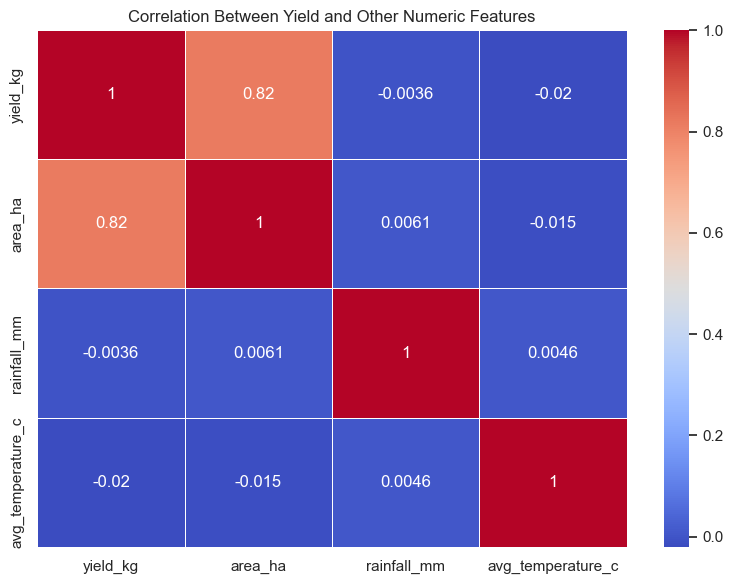

In [66]:
# 3. Correlation heatmap between yield_kg, area_ha, rainfall_mm, and avg_temperature_c

# Select numeric columns to analyze
corr_cols = ['yield_kg', 'area_ha', 'rainfall_mm', 'avg_temperature_c']

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Yield and Other Numeric Features')
plt.tight_layout()
plt.show()

Irrigation & Soil

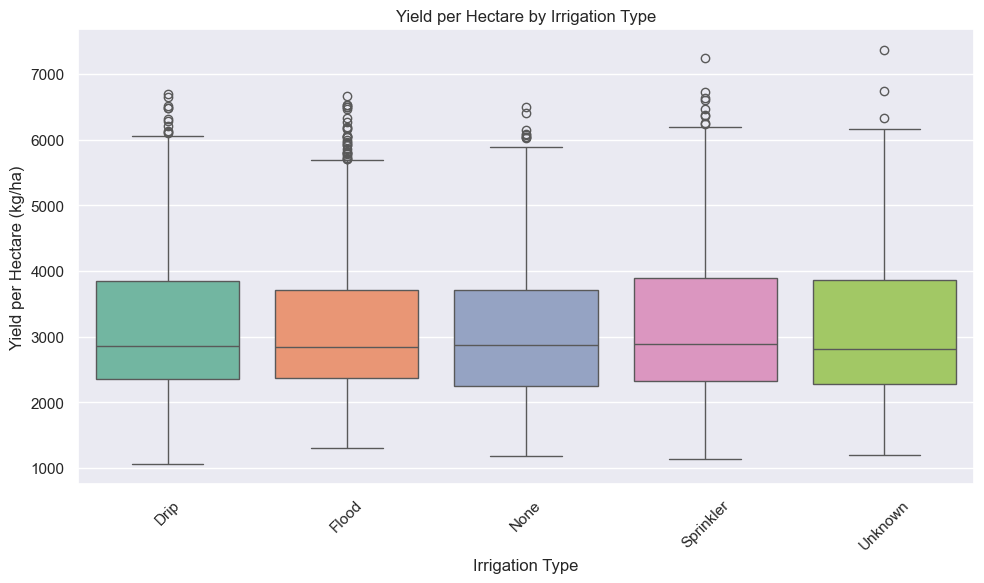

In [ ]:
# 1. Does irrigation type affect average yield/ha? Create a boxplot of yield/ha by irrigation type

# Yield per Hectare by Irrigation Type
df['yield_per_ha'] = df['yield_kg'] / df['area_ha']

plt.figure(figsize=(10, 6))
sns.boxplot(x='irrigation_type', y='yield_per_ha', data=df, palette='Set2')
plt.title('Yield per Hectare by Irrigation Type')
plt.xlabel('Irrigation Type')
plt.ylabel('Yield per Hectare (kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

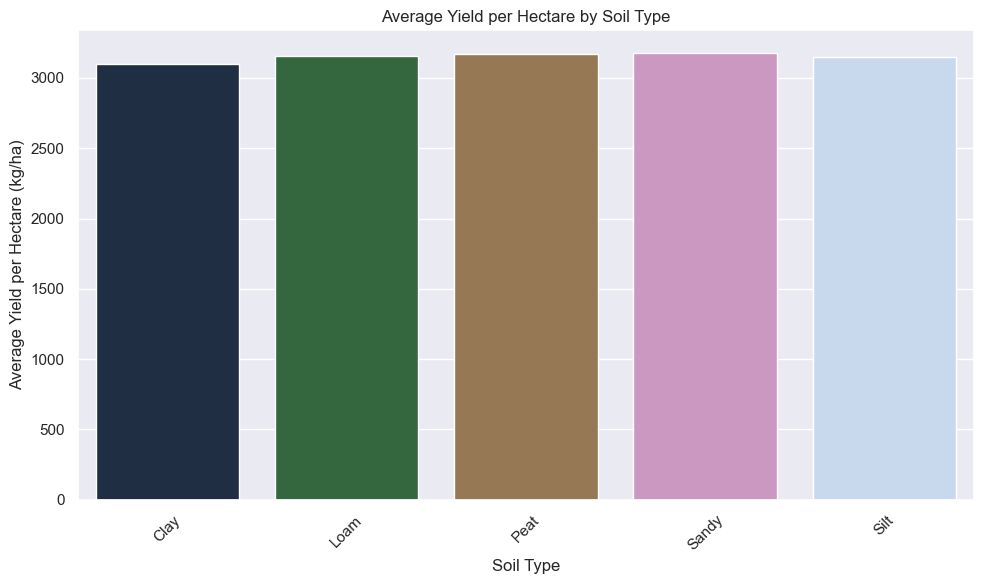

In [68]:
# 2. Which soil type produces the highest average yield? Plot a bar chart

# 2. Average Yield per Hectare by Soil Type (Bar Chart)
soil_yield = df.groupby('soil_type')['yield_per_ha'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=soil_yield.index, y=soil_yield.values, palette='cubehelix')
plt.title('Average Yield per Hectare by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Average Yield per Hectare (kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

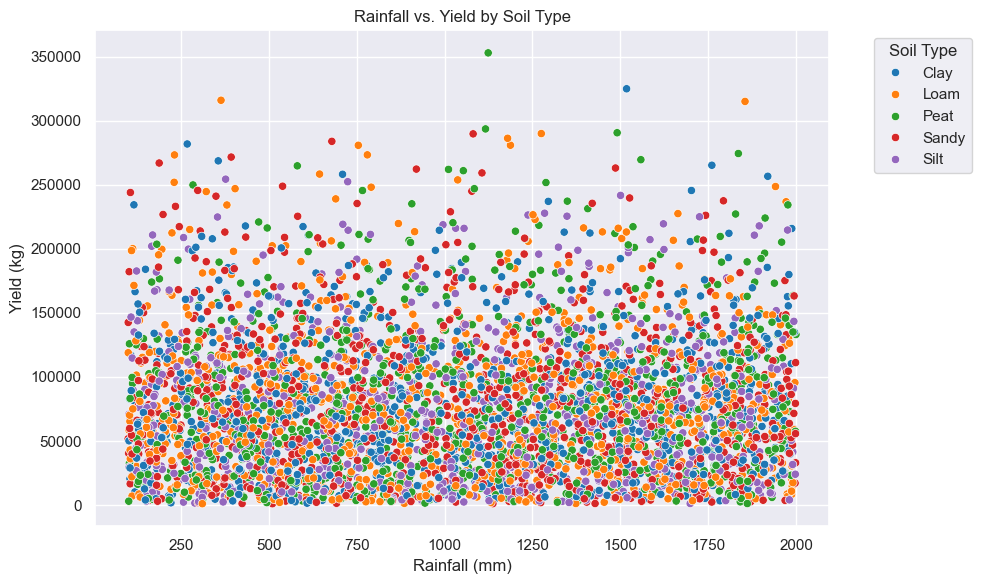

In [69]:
# 3. Scatter plot of rainfall_mm vs. yield_kg, colored by soil_type or irrigation_type

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rainfall_mm', y='yield_kg', hue='soil_type', palette='tab10')
plt.title('Rainfall vs. Yield by Soil Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (kg)')
plt.legend(title='Soil Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Fertilizer & Pesticide Usage

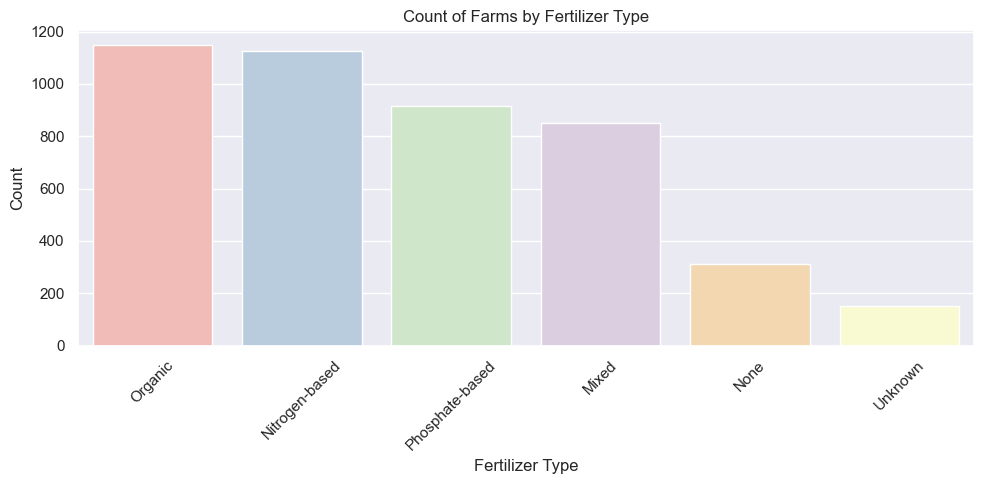

In [ ]:
# 1. Count and percentage of farms using each fertilizer type and each pesticide type (use a countplot)

# 1a. Count of Fertilizer Types
plt.figure(figsize=(10, 5))
sns.countplot(x='fertilizer_used', data=df, palette='Pastel1', order=df['fertilizer_used'].value_counts().index)
plt.title('Count of Farms by Fertilizer Type')
plt.xlabel('Fertilizer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


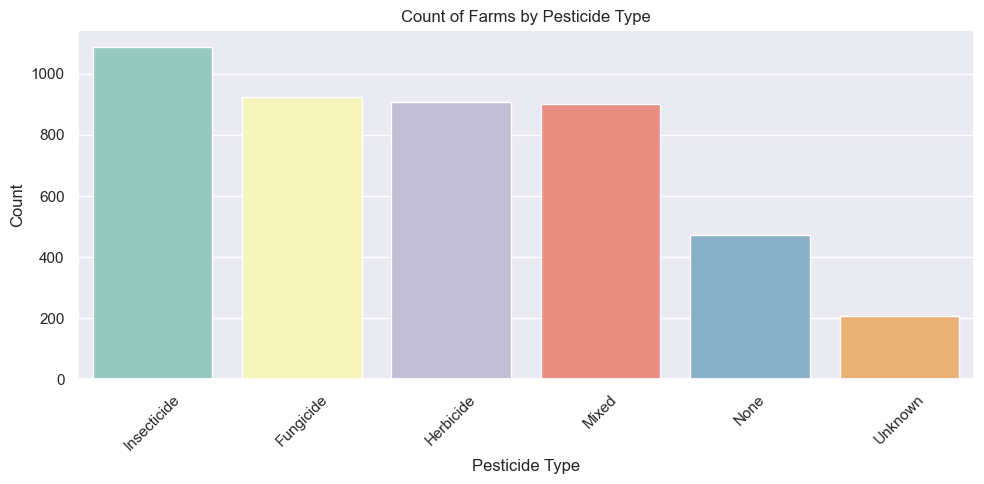

In [71]:
# 1b. Count of Pesticide Types
plt.figure(figsize=(10, 5))
sns.countplot(x='pesticide_used', data=df, palette='Set3', order=df['pesticide_used'].value_counts().index)
plt.title('Count of Farms by Pesticide Type')
plt.xlabel('Pesticide Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# 1c. Percentage calculation

fert_percent = df['fertilizer_used'].value_counts(normalize=True) * 100
pest_percent = df['pesticide_used'].value_counts(normalize=True) * 100

print("Fertilizer Type Percentages:\n", fert_percent.round(2))
print("\nPesticide Type Percentages:\n", pest_percent.round(2))

Fertilizer Type Percentages:
 fertilizer_used
Organic            25.49
Nitrogen-based     25.04
Phosphate-based    20.33
Mixed              18.87
None                6.93
Unknown             3.33
Name: proportion, dtype: float64

Pesticide Type Percentages:
 pesticide_used
Insecticide    24.18
Fungicide      20.53
Herbicide      20.18
Mixed          20.00
None           10.47
Unknown         4.64
Name: proportion, dtype: float64


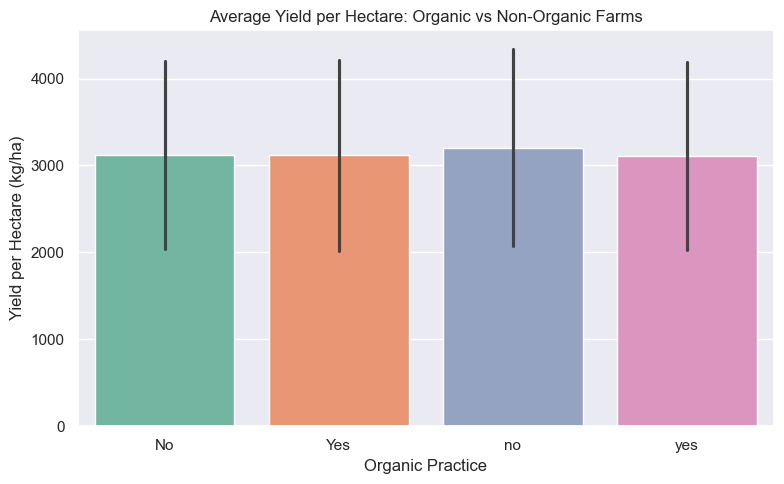

In [73]:
# 2. For farms that use organic methods (Organic = “Yes”) versus non-organic, compare average yield/ha (bar chart or violin plot)

# 2. Compare Organic vs. Non-Organic Yield/ha
plt.figure(figsize=(8, 5))
sns.barplot(x='organic', y='yield_per_ha', data=df, palette='Set2', ci='sd')
plt.title('Average Yield per Hectare: Organic vs Non-Organic Farms')
plt.xlabel('Organic Practice')
plt.ylabel('Yield per Hectare (kg/ha)')
plt.tight_layout()
plt.show()

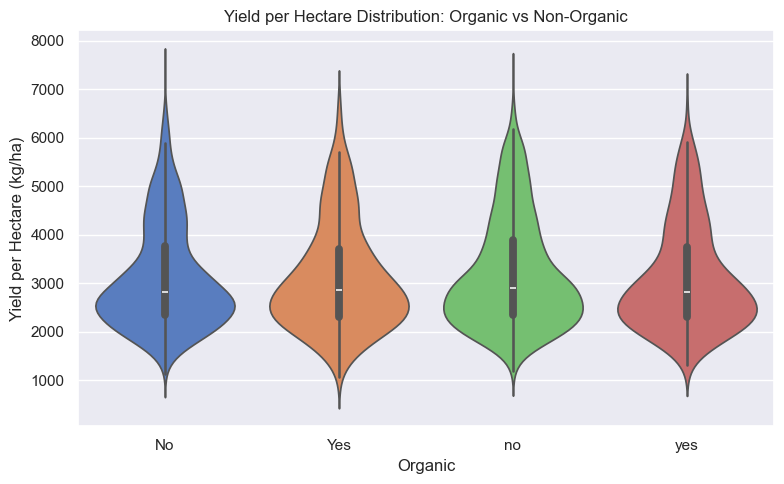

In [74]:
# 2b using violin plot

plt.figure(figsize=(8, 5))
sns.violinplot(x='organic', y='yield_per_ha', data=df, palette='muted')
plt.title('Yield per Hectare Distribution: Organic vs Non-Organic')
plt.xlabel('Organic')
plt.ylabel('Yield per Hectare (kg/ha)')
plt.tight_layout()
plt.show()

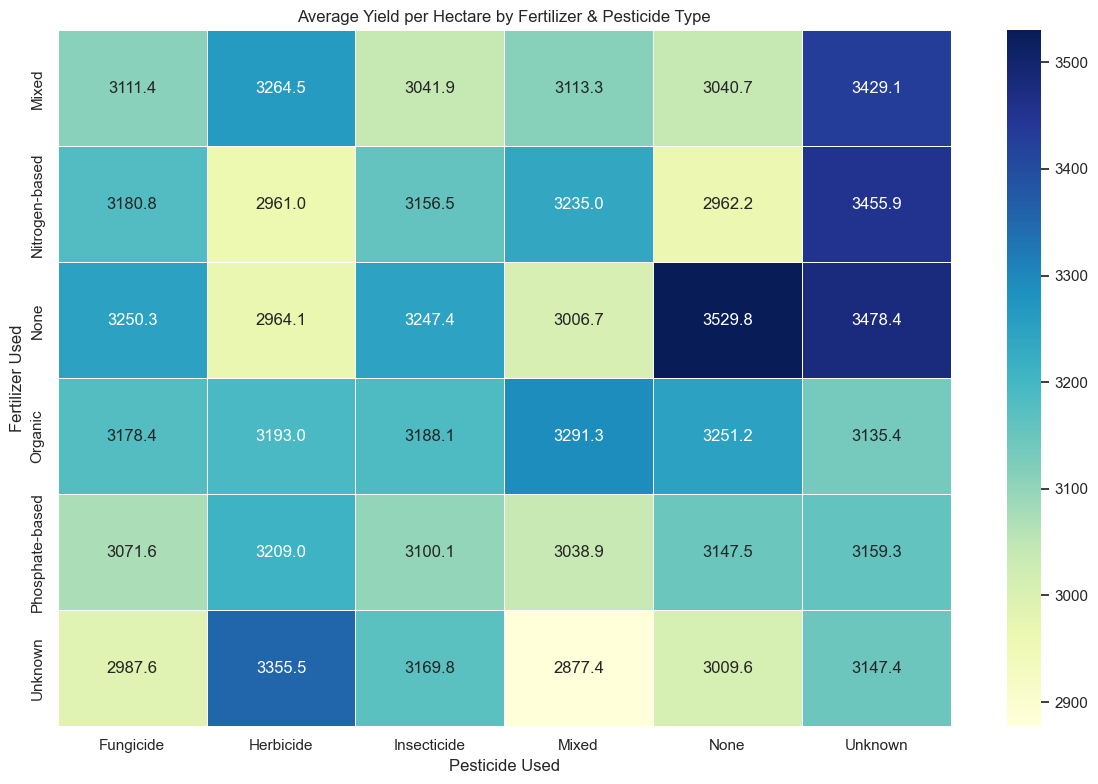

In [75]:
# 3. Heatmap or pivot table showing average yield/ha for each combination of fertilizer and pesticide type

# Pivot table for yield/ha
pivot = df.pivot_table(values='yield_per_ha', index='fertilizer_used', columns='pesticide_used', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Average Yield per Hectare by Fertilizer & Pesticide Type')
plt.xlabel('Pesticide Used')
plt.ylabel('Fertilizer Used')
plt.tight_layout()
plt.show()

Climate Factors

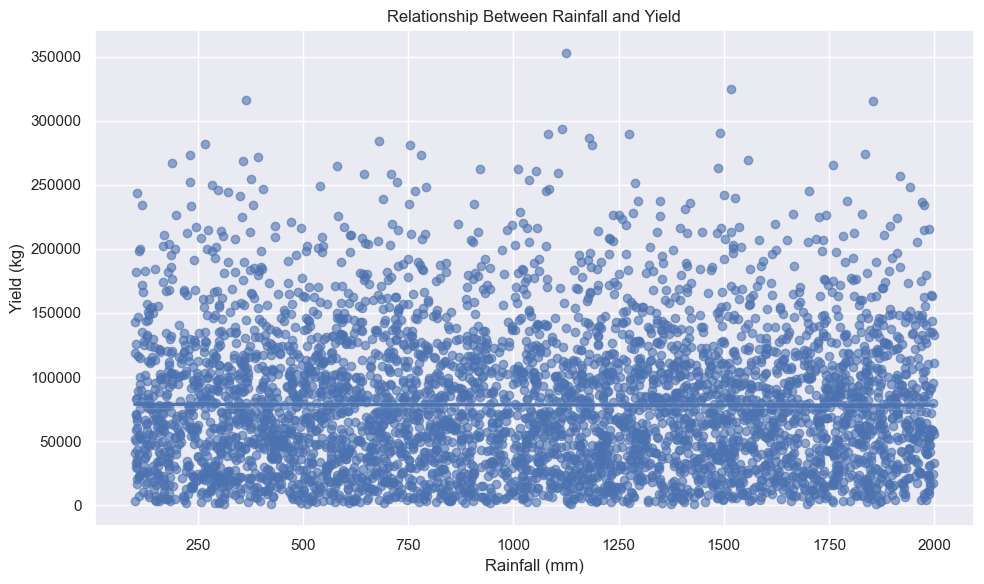

In [ ]:
# 1. Plot the relationship between rainfall_mm and yield_kg (scatter plot with regression line)

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='rainfall_mm', y='yield_kg', data=df, scatter_kws={'alpha':0.6})
plt.title('Relationship Between Rainfall and Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()

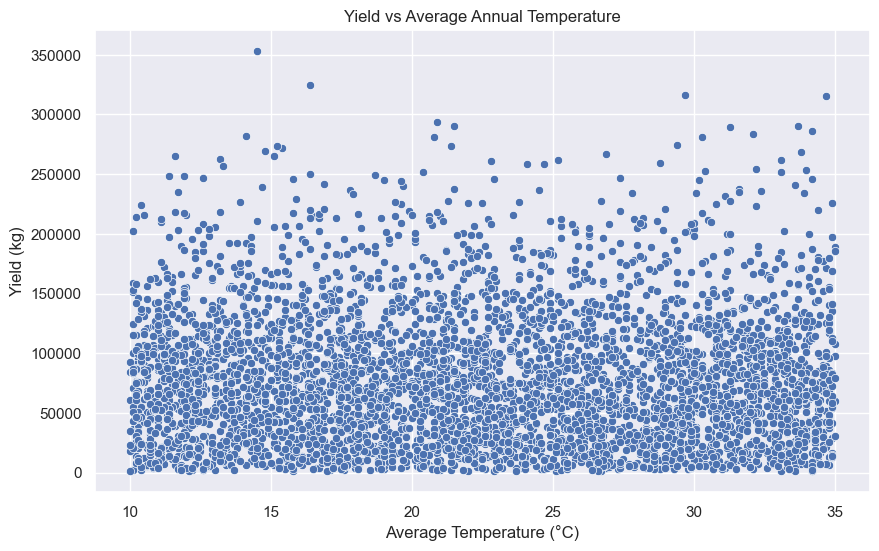

In [77]:
# 2. Does average annual temperature (avg_temperature_c) correlate with yield? Show a scatterplot or jointplot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_temperature_c', y='yield_kg')
plt.title('Yield vs Average Annual Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (kg)')
plt.show()

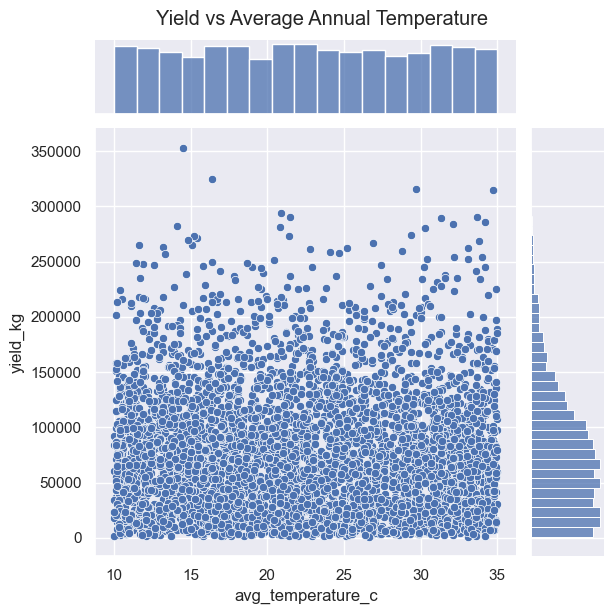

In [78]:
# 2b

sns.jointplot(data=df, x='avg_temperature_c', y='yield_kg', kind='scatter')
plt.suptitle('Yield vs Average Annual Temperature', y=1.02)
plt.show()

In [79]:
correlation = df['avg_temperature_c'].corr(df['yield_kg'])
print(f"Correlation between avg_temperature_c and yield_kg: {correlation:.2f}")

Correlation between avg_temperature_c and yield_kg: -0.02


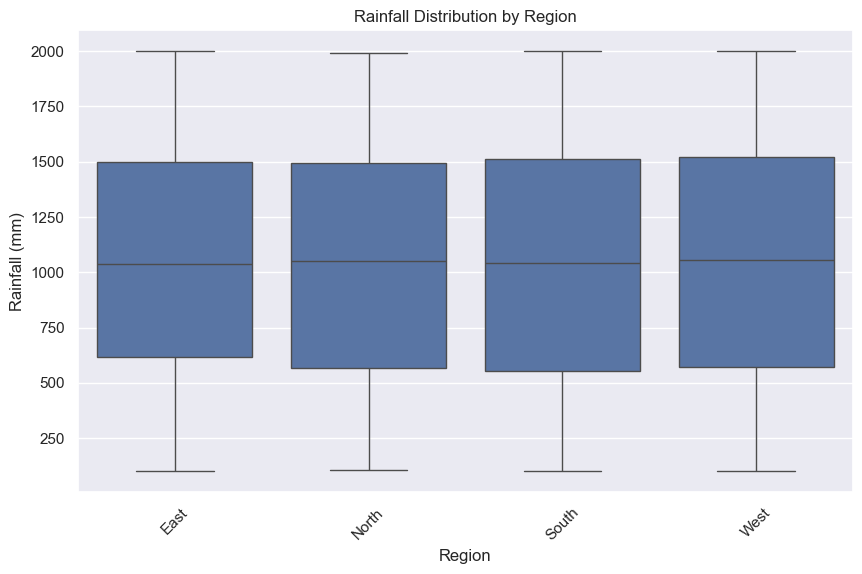

In [80]:
# 3. Boxplot of rainfall_mm distribution by region to see which regions get the most/least rain

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='rainfall_mm')
plt.title('Rainfall Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)  # In case region names are long
plt.show()

Farmer Demographics

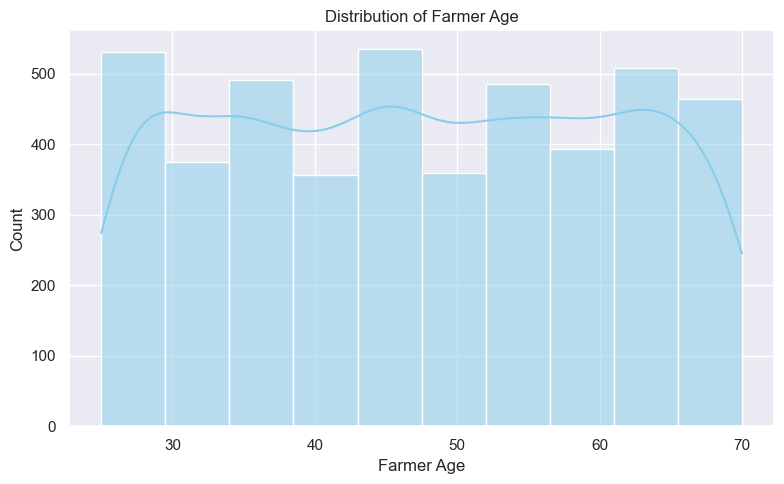

In [ ]:
# 1. Distribution of farmer age (histogram)

plt.figure(figsize=(8, 5))
sns.histplot(df['farmer_age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Farmer Age')
plt.xlabel('Farmer Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [86]:
# 2. Average yield/ha by farmer age group (e.g., binned into 25–35, 36–45, etc.)

age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['21–30', '31–40', '41–50', '51–60', '61–70', '71-80']
df['age_group'] = pd.cut(df['farmer_age'], bins=age_bins, labels=age_labels)

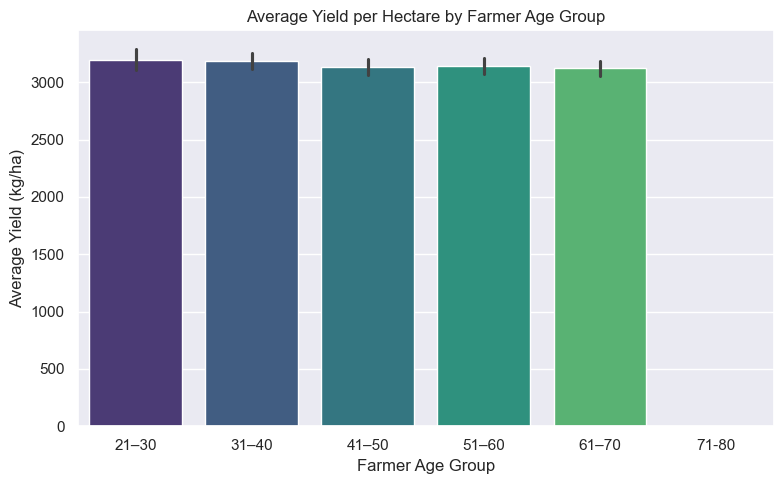

In [87]:
# Plot

plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y=(df['yield_kg'] / df['area_ha']), data=df, palette='viridis', estimator='mean')
plt.title('Average Yield per Hectare by Farmer Age Group')
plt.xlabel('Farmer Age Group')
plt.ylabel('Average Yield (kg/ha)')
plt.tight_layout()
plt.show()

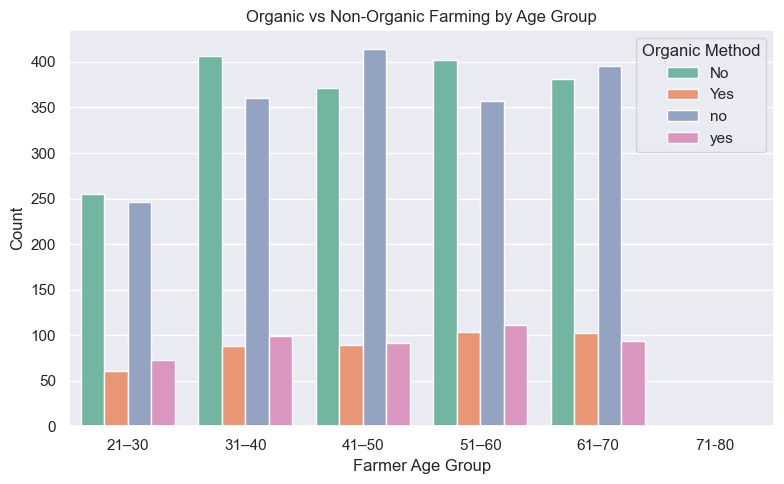

In [88]:
# 3. Are older farmers more likely to use organic methods? (bar chart of organic vs. non-organic across age bins)

plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', hue='organic', data=df, palette='Set2')
plt.title('Organic vs Non-Organic Farming by Age Group')
plt.xlabel('Farmer Age Group')
plt.ylabel('Count')
plt.legend(title='Organic Method')
plt.tight_layout()
plt.show()

Time-to-Harvest

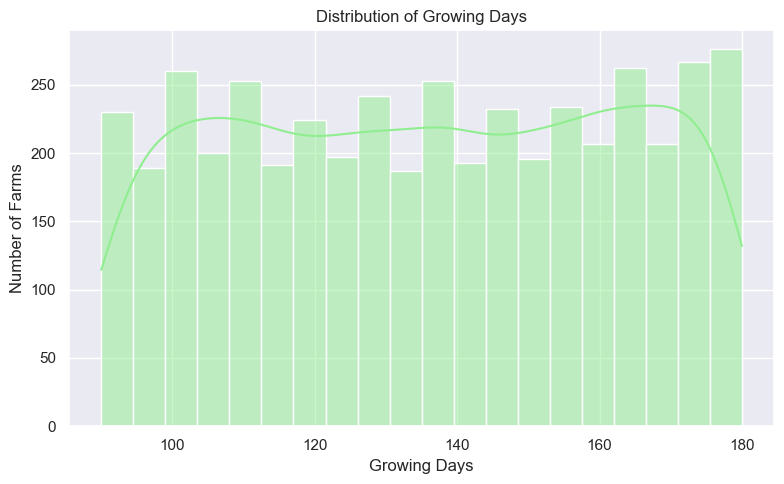

In [ ]:
# 1. Distribution of growing_days (histogram)

plt.figure(figsize=(8, 5))
sns.histplot(df['growing_days'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Growing Days')
plt.xlabel('Growing Days')
plt.ylabel('Number of Farms')
plt.tight_layout()
plt.show()

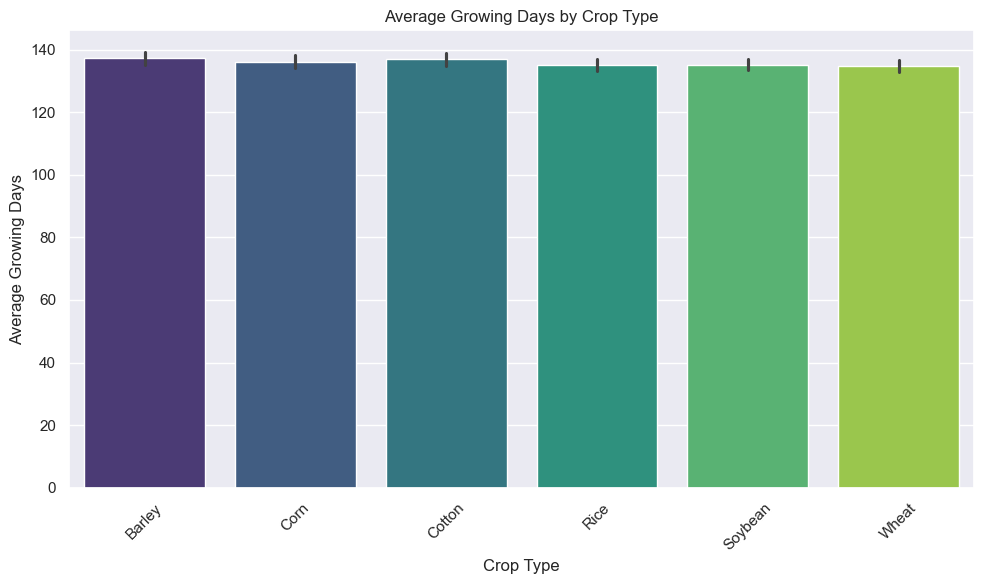

In [90]:
# 2. Compare average growing_days by crop type (bar chart)

plt.figure(figsize=(10, 6))
sns.barplot(x='crop_type', y='growing_days', data=df, estimator='mean', palette='viridis')
plt.title('Average Growing Days by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Growing Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

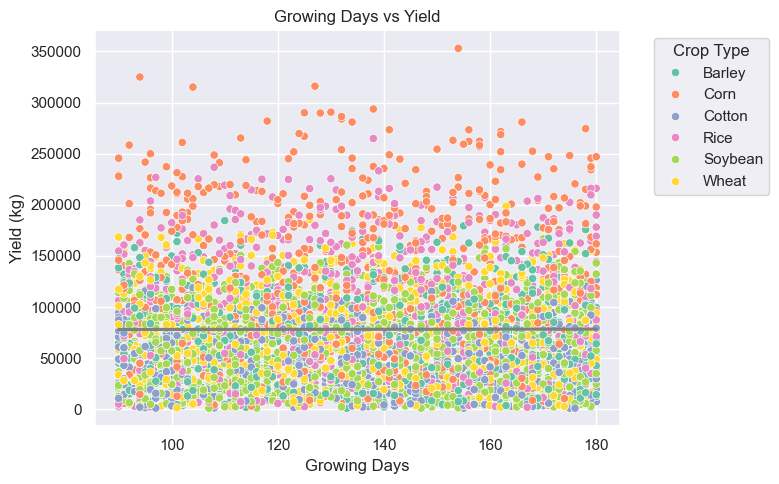

In [91]:
# 3. Scatterplot of growing_days vs. yield_kg to see if longer growing periods yield more

plt.figure(figsize=(8, 5))
sns.scatterplot(x='growing_days', y='yield_kg', hue='crop_type', data=df, palette='Set2')
sns.regplot(x='growing_days', y='yield_kg', data=df, scatter=False, color='gray', ci=None)
plt.title('Growing Days vs Yield')
plt.xlabel('Growing Days')
plt.ylabel('Yield (kg)')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
df.head()

,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,...,avg_temperature_c,farmer_age,organic,planting_year,harvest_year,planting_month,growing_days,days_since_harvest,yield_per_ha,age_group
0,1,South,Soybean,2023-08-02,2023-12-29,49.94,124319,Drip,Silt,Organic,...,19.2,32,no,2023,2023,2023-08,149,530,2489.367241,31–40
1,2,West,Rice,2020-08-16,2020-12-13,3.22,10133,Sprinkler,Silt,Nitrogen-based,...,31.7,59,yes,2020,2020,2020-08,119,1641,3146.894410,51–60
2,3,West,Cotton,2020-02-21,2020-07-11,29.14,57217,Flood,Loam,Organic,...,18.1,52,no,2020,2020,2020-02,141,1796,1963.520933,51–60
3,4,South,Rice,2024-02-27,2024-08-15,4.59,22377,Sprinkler,Loam,Mixed,...,13.8,39,No,2024,2024,2024-02,170,300,4875.163399,31–40
4,5,East,Corn,2021-07-17,2021-11-07,8.15,50157,Unknown,Silt,Nitrogen-based,...,26.0,53,No,2021,2021,2021-07,113,1312,6154.233129,51–60


Additional Deep Dives

In [ ]:
# 1. Identify the top 5 farms with highest yield per hectare. What crop, region, and practices do they use?

# Get top 5 farms
top_farms = df.sort_values(by='yield_per_ha', ascending=False).head(5)

# Show important info
top_farms_info = top_farms[['farm_id', 'region', 'crop_type', 'yield_kg', 'area_ha', 'yield_per_ha',
                               'irrigation_type', 'soil_type', 'fertilizer_used', 'pesticide_used', 'organic']]

print(top_farms_info)


      farm_id region crop_type  yield_kg  area_ha  yield_per_ha  \
1084     1085  South      Corn    118311    16.07   7362.227754   
99        100  South      Corn    353010    48.76   7239.745693   
338       339  North      Corn     38634     5.73   6742.408377   
3675     3676   East      Corn     39257     5.84   6722.089041   
2343     2344   East      Corn    216324    32.32   6693.193069   

     irrigation_type soil_type  fertilizer_used pesticide_used organic  
1084         Unknown      Clay          Organic    Insecticide      No  
99         Sprinkler      Peat  Phosphate-based        Unknown      no  
338          Unknown     Sandy            Mixed    Insecticide     Yes  
3675       Sprinkler      Peat             None    Insecticide      no  
2343            Drip      Peat          Organic          Mixed     yes  


In [95]:
# 2. Among “Flood” or “None” irrigation farms (worst irrigation), 
# which ones still have high yields? Analyze possible factors (soil, fertilizer).

# Define poor irrigation types
poor_irrigation = df[df['irrigation_type'].isin(['Flood', 'None'])]

# Filter those with high yield per hectare (e.g., top 25%)
threshold = poor_irrigation['yield_per_ha'].quantile(0.75)
high_yield_poor_irrigation = poor_irrigation[poor_irrigation['yield_per_ha'] >= threshold]

# Inspect soil, fertilizer, pesticide
print(high_yield_poor_irrigation[['farm_id', 'yield_per_ha', 'soil_type',
                                  'fertilizer_used', 'pesticide_used', 'organic']])

      farm_id  yield_per_ha soil_type  fertilizer_used pesticide_used organic
10         11   5256.866538      Loam   Nitrogen-based      Fungicide      No
11         12   5222.548614      Silt          Organic      Fungicide      no
47         48   4301.638505      Clay          Organic           None      no
58         59   4491.401649      Clay          Organic    Insecticide     yes
60         61   5813.684211      Clay   Nitrogen-based      Fungicide      no
...       ...           ...       ...              ...            ...     ...
4401     4402   5639.237057      Clay            Mixed    Insecticide      No
4421     4422   3920.674487     Sandy   Nitrogen-based      Fungicide      no
4447     4448   5499.219157      Peat          Organic      Fungicide      No
4478     4479   4337.692308      Clay  Phosphate-based    Insecticide      No
4498     4499   3984.558238      Loam          Organic      Fungicide      no

[334 rows x 6 columns]


   crop_type region  yield_per_ha      performance
6       Corn  South   5020.619823    Outperforming
5       Corn  North   4992.838465    Outperforming
4       Corn   East   4980.809310    Outperforming
7       Corn   West   4970.188361    Outperforming
14      Rice  South   4054.257701    Outperforming
15      Rice   West   4050.043323    Outperforming
13      Rice  North   3985.826906    Outperforming
12      Rice   East   3984.089321    Outperforming
22     Wheat  South   3060.026012  Underperforming
20     Wheat   East   3029.265475  Underperforming
21     Wheat  North   2992.886864  Underperforming
23     Wheat   West   2955.667814  Underperforming
3     Barley   West   2792.331105  Underperforming
1     Barley  North   2782.127432  Underperforming
2     Barley  South   2780.692490  Underperforming
0     Barley   East   2746.595900  Underperforming
18   Soybean  South   2505.106957  Underperforming
16   Soybean   East   2499.016681  Underperforming
17   Soybean  North   2494.4526

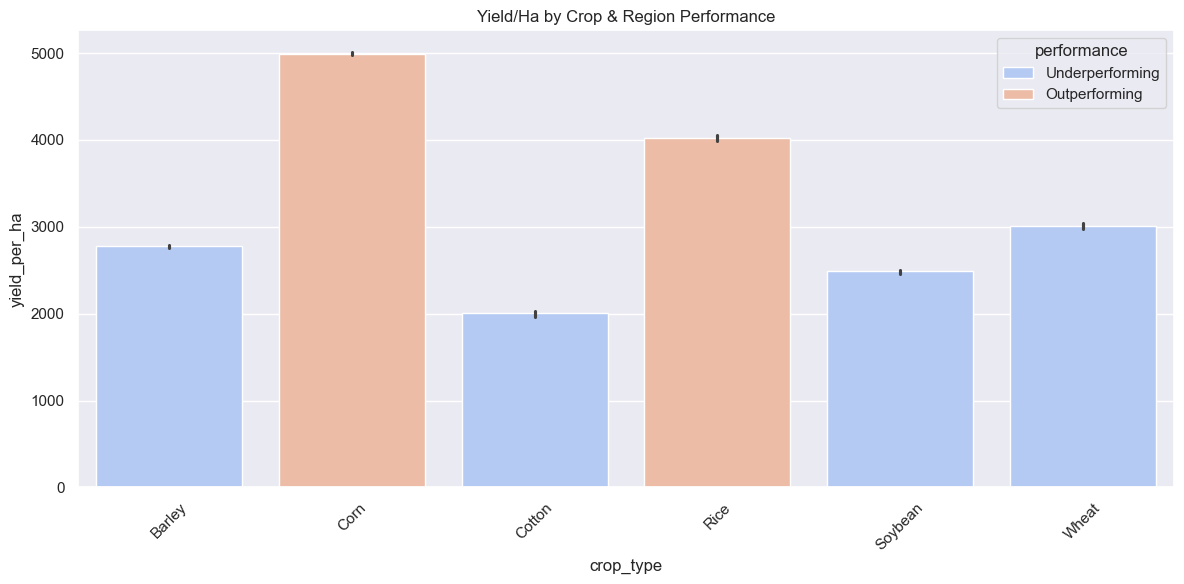

In [98]:
# 3. Which crop–region combinations underperform or outperform overall benchmarks?

# Calculate global average yield per ha
global_avg_yield = df['yield_per_ha'].mean()

# Group by crop and region
combo_yield = df.groupby(['crop_type', 'region'])['yield_per_ha'].mean().reset_index()

# Add performance label
combo_yield['performance'] = combo_yield['yield_per_ha'].apply(
    lambda x: 'Outperforming' if x > global_avg_yield else 'Underperforming')

print(combo_yield.sort_values(by='yield_per_ha', ascending=False))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=combo_yield, x='crop_type', y='yield_per_ha', hue='performance', palette='coolwarm')
plt.title('Yield/Ha by Crop & Region Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seasonal Trends

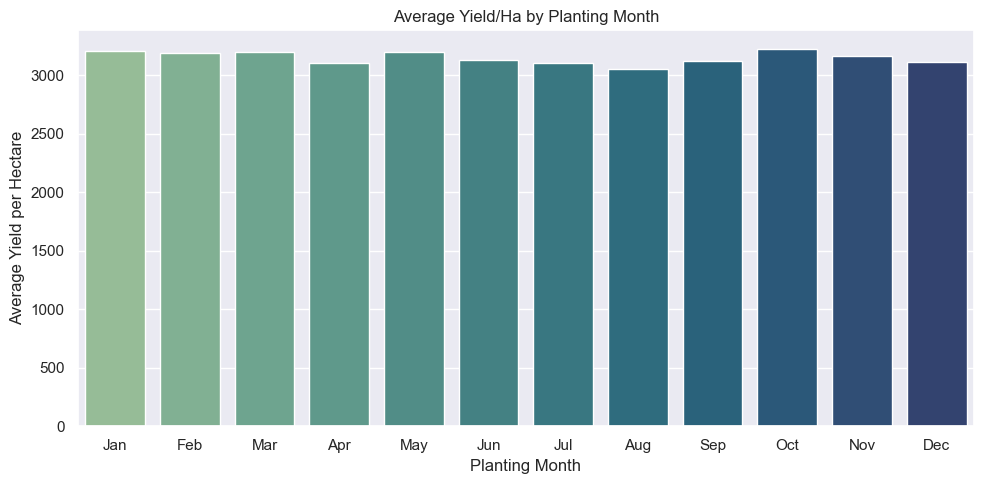

In [ ]:
# 1. Aggregate average yield/ha by planting_month (e.g., Jan–Dec) to see seasonal variation

# Ensure planting_month is datetime
df['planting_month'] = pd.to_datetime(df['planting_date']).dt.month

# Create a label column for month names
df['planting_month_name'] = df['planting_month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Group by month and calculate average yield/ha
monthly_yield = df.groupby('planting_month_name')['yield_per_ha'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_yield.index, y=monthly_yield.values, palette='crest')
plt.title('Average Yield/Ha by Planting Month')
plt.xlabel('Planting Month')
plt.ylabel('Average Yield per Hectare')
plt.tight_layout()
plt.show()

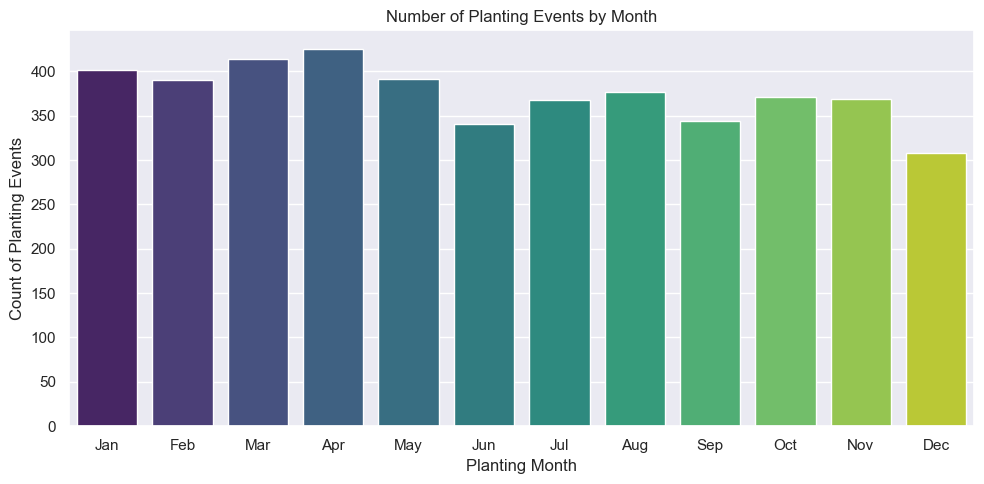

In [102]:
# 2. Plot count of planting events by month to detect peak planting seasons

# Count how many farms planted in each month
monthly_counts = df['planting_month_name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Number of Planting Events by Month')
plt.xlabel('Planting Month')
plt.ylabel('Count of Planting Events')
plt.tight_layout()
plt.show()

# Bonus Tasks
Custom Functions

In [ ]:
# 1. Write a function classify_yield_per_ha(row) 
# that creates a new column yield_category (e.g., “Low,” “Medium,” “High”) based on yield per hectare thresholds

# Basic summary statistics
min_yield = df['yield_per_ha'].min()
max_yield = df['yield_per_ha'].max()

print(f"Minimum yield per hectare: {min_yield:.2f} kg/ha")
print(f"Maximum yield per hectare: {max_yield:.2f} kg/ha")

# Quantiles for better range insight
print(df['yield_per_ha'].describe())

Minimum yield per hectare: 1064.99 kg/ha
Maximum yield per hectare: 7362.23 kg/ha
count    4500.000000
mean     3151.411186
std      1104.467350
min      1064.986608
25%      2326.055818
50%      2858.376473
75%      3810.913127
max      7362.227754
Name: yield_per_ha, dtype: float64


In [105]:
# Classify yield_per_ha(row)

def classify_yield_per_ha(row):
    if row['yield_per_ha'] <= 2326.06:
        return 'Low'
    elif row['yield_per_ha'] <= 3810.91:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['yield_category'] = df.apply(classify_yield_per_ha, axis=1)

In [111]:
df[['planting_month_name', 'yield_category']].head()

,planting_month_name,yield_category
0,Aug,Medium
1,Aug,Medium
2,Feb,Low
3,Feb,High
4,Jul,High


In [107]:
# 2. Write a function random_market_price(yield_kg) 
# that assigns a random price (in $ per kg) and compute a new column revenue_estimate = yield_kg × random_price

def random_market_price():
    return np.round(np.random.uniform(0.2, 1.5), 2)  # Price between $0.20 and $1.50

# Assign random price for each row
df['random_price'] = df['yield_kg'].apply(lambda x: random_market_price())

# Calculate estimated revenue
df['revenue_estimate'] = df['yield_kg'] * df['random_price']

In [109]:
df[['yield_kg', 'yield_category', 'random_price', 'revenue_estimate']].head()

,yield_kg,yield_category,random_price,revenue_estimate
0,124319,Medium,1.28,159128.32
1,10133,Medium,1.41,14287.53
2,57217,Low,0.72,41196.24
3,22377,High,1.19,26628.63
4,50157,High,0.82,41128.74


Advanced Parsing

In [ ]:
# Write a function to parse crop_variety from Crop_Type 
# (e.g., if you later combine “Rice – Basmati,” split into separate columns). 
# For now, add noise to Crop_Type (e.g., “Wheat (Durum)”) and then split it back.

import random

# Create a small list of example noisy varieties
varieties = {
    'Wheat': ['Durum', 'Hard Red'],
    'Rice': ['Basmati', 'Jasmine'],
    'Corn': ['Sweet', 'Field'],
    'Soybean': ['Edamame'],
    'Barley': ['Hulled']
}

# Function to simulate noise in crop_type
def add_variety_noise(row):
    crop = row['crop_type']
    if crop in varieties and random.random() < 0.4:  # Add variety in 40% of cases
        variety = random.choice(varieties[crop])
        return f"{crop} ({variety})"
    else:
        return crop

# Apply the noise function
df['crop_type'] = df.apply(add_variety_noise, axis=1)

In [113]:
import re

# Define parsing function
def parse_crop_type(crop_entry):
    match = re.match(r'^(.*?)\s*(?:[\(\-–])\s*(.*?)\s*\)?$', crop_entry)
    if match:
        return pd.Series([match.group(1).strip(), match.group(2).strip()])
    else:
        return pd.Series([crop_entry.strip(), None])

# Apply it to create new columns
df[['main_crop', 'crop_variety']] = df['crop_type'].apply(parse_crop_type)

In [114]:
df[['crop_type', 'main_crop', 'crop_variety']].head(10)

,crop_type,main_crop,crop_variety
0,Soybean,Soybean,None
1,Rice,Rice,None
2,Cotton,Cotton,None
3,Rice,Rice,None
4,Corn (Field),Corn,Field
5,Corn (Sweet),Corn,Sweet
6,Soybean,Soybean,None
7,Wheat,Wheat,None
8,Cotton,Cotton,None
9,Rice (Basmati),Rice,Basmati


Text Analysis (Stretch)

In [ ]:
# 1. Suppose you have a column Notes listing multiple farm certifications separated by commas 
# (e.g., “FairTrade, Rainforest Alliance”). Simulate such a column and then:

# List of possible certifications
certifications = ['FairTrade', 'Rainforest Alliance', 'Organic Certified', 'GAP', 'Non-GMO']

# Function to randomly assign certifications
def generate_cert_notes():
    selected = random.sample(certifications, random.randint(0, 3))
    return ", ".join(selected) if selected else None

# Add to dataframe
df['Notes'] = [generate_cert_notes() for _ in range(len(df))]

# Preview
df['Notes'].head()

0              Non-GMO, GAP, Rainforest Alliance
1    Rainforest Alliance, GAP, Organic Certified
2                                           None
3                       GAP, Rainforest Alliance
4                                           None
Name: Notes, dtype: object

In [116]:
# 2. Split it into separate boolean columns (one per certification)

# First, fill missing with empty string to avoid errors
df['Notes'] = df['Notes'].fillna('')

# Create binary columns for each certification
for cert in certifications:
    df[cert] = df['Notes'].str.contains(cert, case=False, na=False)

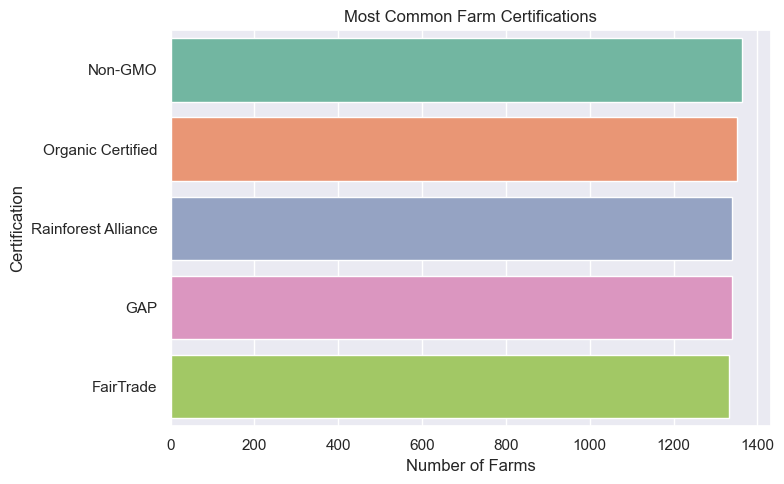

In [117]:
# 3. Count which certifications are most common

# Count how many farms have each certification
cert_counts = {cert: df[cert].sum() for cert in certifications}

# Convert to Series and sort
cert_counts_series = pd.Series(cert_counts).sort_values(ascending=False)

# Display as bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cert_counts_series.values, y=cert_counts_series.index, palette='Set2')
plt.title('Most Common Farm Certifications')
plt.xlabel('Number of Farms')
plt.ylabel('Certification')
plt.tight_layout()
plt.show()

In [118]:
df[df['FairTrade'] & df['Organic Certified']]

,farm_id,region,crop_type,planting_date,harvest_date,area_ha,yield_kg,irrigation_type,soil_type,fertilizer_used,...,random_price,revenue_estimate,main_crop,crop_variety,Notes,FairTrade,Rainforest Alliance,Organic Certified,GAP,Non-GMO
6,7,West,Soybean,2021-04-02,2021-09-20,25.77,54981,None,Sandy,None,...,1.25,68726.25,Soybean,None,"Organic Certified, FairTrade",True,False,True,False,False
27,28,South,Wheat (Durum),2024-01-06,2024-04-28,36.79,107198,None,Loam,Organic,...,1.30,139357.40,Wheat,Durum,"FairTrade, Organic Certified",True,False,True,False,False
49,50,East,Barley (Hulled),2021-11-20,2022-03-12,21.87,52180,None,Loam,Nitrogen-based,...,0.57,29742.60,Barley,Hulled,"FairTrade, Organic Certified",True,False,True,False,False
50,51,West,Cotton,2020-07-28,2021-01-20,39.20,89882,Flood,Clay,Mixed,...,0.39,35053.98,Cotton,None,"FairTrade, Organic Certified, GAP",True,False,True,True,False
80,81,West,Cotton,2020-04-03,2020-09-22,12.76,22413,Sprinkler,Sandy,Nitrogen-based,...,0.20,4482.60,Cotton,None,"Rainforest Alliance, FairTrade, Organic Certified",True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,4447,South,Wheat (Hard Red),2020-11-04,2021-03-30,9.43,30323,Drip,Loam,None,...,0.82,24864.86,Wheat,Hard Red,"FairTrade, Non-GMO, Organic Certified",True,False,True,False,True
4453,4454,South,Barley,2025-02-28,2025-08-19,27.11,85205,Drip,Clay,Organic,...,1.03,87761.15,Barley,None,"GAP, Organic Certified, FairTrade",True,False,True,True,False
4461,4462,North,Rice (Basmati),2021-09-30,2022-03-21,27.35,124578,Sprinkler,Clay,Organic,...,1.19,148247.82,Rice,Basmati,"FairTrade, Organic Certified, Non-GMO",True,False,True,False,True
4473,4474,South,Rice,2023-11-27,2024-04-28,46.32,140859,Drip,Silt,Nitrogen-based,...,1.13,159170.67,Rice,None,"Organic Certified, FairTrade",True,False,True,False,False


Geo-Mapping (Extra Credit)

In [ ]:
# 1. Assign each region a latitude/longitude centroid (you can invent approximate coordinates)

# Assign sample coordinates to each region
region_coords = {
    'North': (12.0, 8.5),
    'South': (5.0, 7.5),
    'East': (6.5, 8.0),
    'West': (7.0, 4.0),
    'Central': (9.0, 7.0)  # in case you have a Central or default
}

# Map lat/long to the DataFrame
df['Latitude'] = df['region'].map(lambda x: region_coords.get(x, (0, 0))[0])
df['Longitude'] = df['region'].map(lambda x: region_coords.get(x, (0, 0))[1])

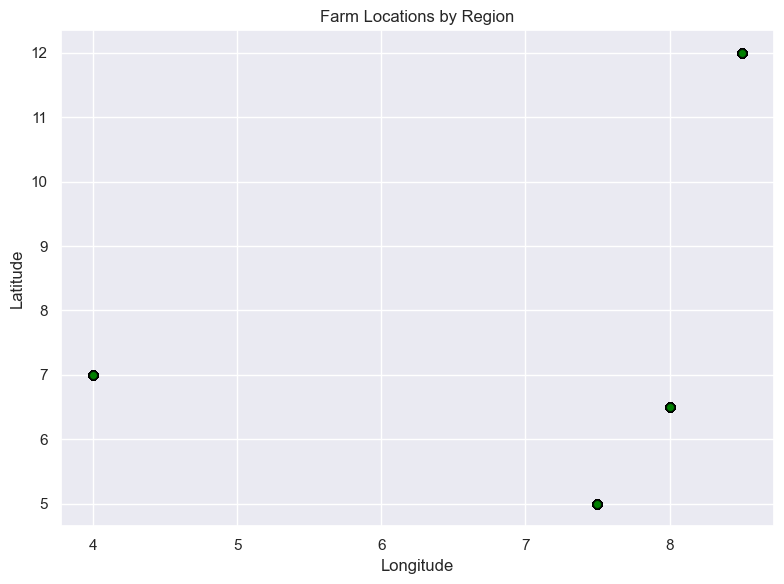

In [120]:
# 2. Plot farm locations on a scatter map 
# (if using an external library like Folium or use a simple scatter plot with lat/long axes)

plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6, c='green', edgecolor='black')
plt.title('Farm Locations by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()